In [1]:
import pandas as pd
import glob
from  sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error,max_error,mean_absolute_error

In [2]:
all_data = pd.DataFrame()
for f in glob.glob(r"D:\Books\Project\Draft1_fabien\leak-exp-day2\Exact\release*.xlsx"):
    df = pd.read_excel(f)
    all_data = all_data.append(df,ignore_index=True)

In [3]:
#print(all_data)

In [4]:
s1 = all_data['123'].values[:]
s2 = all_data['134'].values[:]
s3 = all_data['157'].values[:]
s4 = all_data['173'].values[:]
s5 = all_data['193'].values[:]
s6 = all_data['195'].values[:]
s7 = all_data['210'].values[:]
s8 = all_data['215'].values[:]
s9 = all_data['238'].values[:]
s10 = all_data['250'].values[:]
s11 = all_data['280'].values[:]
s12 = all_data['291'].values[:]
s13 = all_data['330'].values[:]
s14 = all_data['337'].values[:]
s15 = all_data['342'].values[:]
s16 = all_data['364'].values[:]
s17 = all_data['370'].values[:]
s18 = all_data['374'].values[:]
s19 = all_data['381'].values[:]
s20 = all_data['385'].values[:]
leak_status = all_data['Leakage_Status'].values[:]

In [5]:
#creating features and labels
n_features = list(zip(s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20))
n_samples = leak_status

In [6]:
#Decision tree(DT)  regression
clf = tree.DecisionTreeRegressor()
#spliting of data
X_DT_train, X_DT_test, y_DT_train, y_DT_test = train_test_split(n_features,n_samples, test_size=0.5,random_state=0)
sc = StandardScaler()
X_DT_train_std = sc.fit_transform(X_DT_train)
X_DT_test_std = sc.fit_transform(X_DT_test)
#train model
clf.fit(X_DT_train_std,y_DT_train)
#prediction
y_DT_pred = clf.predict(X_DT_test_std)
print('Decision Tree Accuracy:%.3f'%(100*metrics.accuracy_score(y_DT_test,y_DT_pred.round())))

Decision Tree Accuracy:94.111


In [7]:
#naive bayes NB
X_NB_train, X_NB_test, y_NB_train, y_NB_test = train_test_split(n_features,n_samples, test_size=0.5,random_state=0)
#standradisation of the train model
sc = StandardScaler()
X_NB_train_std = sc.fit_transform(X_NB_train)
X_NB_test_std = sc.fit_transform(X_NB_test)
#creation of model
model = GaussianNB()
model.fit(X_NB_train_std,y_NB_train)
y_NB_pred = model.predict(X_NB_test_std)
print("Naive bayes Accuracy:%.3f"%(100*metrics.accuracy_score(y_NB_test, y_NB_pred)))

Naive bayes Accuracy:77.484


In [8]:
#spliting of data
X_RF_train, X_RF_test, y_RF_train, y_RF_test = train_test_split(n_features,n_samples, test_size=0.5,random_state=0)
sc = StandardScaler()
#
#Random Forest Classifier RF

clf =RandomForestClassifier()
clf.fit(X_RF_train,y_RF_train)
#prediction
y_RF_pred = clf.predict(X_RF_test)
print('Random Forest Accuracy:%.3f'%(100*metrics.accuracy_score(y_RF_test,y_RF_pred)))

Random Forest Accuracy:97.334


C:\Python27\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [9]:
#false postives
x_DT = (y_DT_test != y_DT_pred.round()).sum()
y_DT = ((y_DT_test==y_DT_pred.round()).sum()+(y_DT_test != y_DT_pred.round()).sum())
print('Decision Tree:',x_DT,'/',y_DT)
print('\n')
x_NB = (y_NB_test != y_NB_pred).sum()
y_NB = ((y_NB_test==y_NB_pred).sum()+(y_NB_test != y_NB_pred).sum())
print('Naive Bayes:',x_NB,'/',y_NB)
print('\n')
x_RF = (y_RF_test != y_RF_pred).sum()
y_RF = ((y_RF_test==y_RF_pred).sum()+(y_RF_test != y_RF_pred).sum())
print('Random Forest:',x_RF,'/',y_RF)

Decision Tree: 243 / 4126


Naive Bayes: 929 / 4126


Random Forest: 110 / 4126


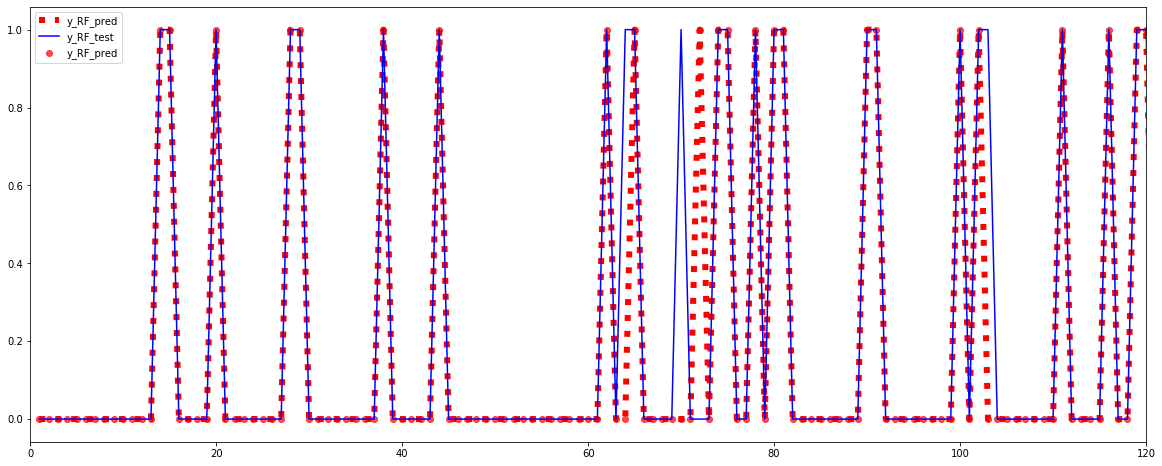

In [10]:
k = []
for i in range(0,len(X_RF_test)):
    k.append(i+1)
plt.figure(figsize = (20,8))
plt.plot(k, y_RF_pred, c='r', label='y_RF_pred',linestyle = 'dotted',linewidth = 6.0)
plt.plot(k, y_RF_test, c='b', label='y_RF_test')
plt.scatter(k, y_RF_pred, c='r', alpha=.7,label = 'y_RF_pred')
plt.xlim(0,120)
plt.legend()
plt.show()

In [11]:
#classification report
target_names = ['Leak', 'No Leak']                 
print(classification_report(y_RF_test, y_RF_pred, target_names=target_names))
print('\t\tRandom Forest\n\n')
print(classification_report(y_NB_test, y_NB_pred, target_names=target_names))
print('\t\tNaive Bayes\n\n')
print(classification_report(y_DT_test, y_DT_pred.round(), target_names=target_names))
print('\t\tDecision Tree\n\n')

              precision    recall  f1-score   support

        Leak       0.97      0.99      0.98      3221
     No Leak       0.97      0.90      0.94       905

    accuracy                           0.97      4126
   macro avg       0.97      0.95      0.96      4126
weighted avg       0.97      0.97      0.97      4126

		Random Forest


              precision    recall  f1-score   support

        Leak       0.83      0.90      0.86      3221
     No Leak       0.48      0.34      0.40       905

    accuracy                           0.77      4126
   macro avg       0.65      0.62      0.63      4126
weighted avg       0.75      0.77      0.76      4126

		Naive Bayes


              precision    recall  f1-score   support

        Leak       0.97      0.95      0.96      3221
     No Leak       0.84      0.90      0.87       905

    accuracy                           0.94      4126
   macro avg       0.91      0.93      0.92      4126
weighted avg       0.94      0.94      0

In [12]:
#X_ML_train, X_ML_test, y_ML_train, y_ML_test = train_test_split(n_features,n_samples, test_size=0.5,random_state=0)
#classifier = MLPClassifier(hidden_layer_sizes=(4000,2000,200), max_iter=8000,activation = 'tanh',solver='adam',random_state=1)
#classifier.fit(X_ML_train,y_ML_train)
#y_ML_pred = classifier.predict(X_ML_test)
#print("Accuracy of MLPClassifier :%.3f"%(100*metrics.accuracy_score(y_ML_test,y_ML_pred)))
#print("finish")

In [13]:
#print(classification_report(y_MLP_test, y_MLP_pred.round(), target_names=target_names))

In [14]:
#mean absolute error
maen = mean_absolute_error(y_NB_test, y_NB_pred)
print('Mean absolute error:%.3f'%(maen))

Mean absolute error:0.225


In [15]:
#Mean squared error
msen = mean_squared_error(y_NB_test, y_NB_pred, multioutput='uniform_average')
print('mean squared error:%.3f'%(msen))

mean squared error:0.225


In [16]:
#mean absolute error
maer = mean_absolute_error(y_RF_test, y_RF_pred)
print('Mean absolute error:%.3f'%(maer))

Mean absolute error:0.027


In [17]:
#Mean squared error
mser = mean_squared_error(y_RF_test, y_RF_pred, multioutput='uniform_average')
print('mean squared error:%.3f'%(mser))

mean squared error:0.027


In [18]:
#mean absolute error
maed = mean_absolute_error(y_DT_test, y_DT_pred)
print('Mean absolute error:%.3f'%(maed))

Mean absolute error:0.061


In [19]:
#Mean squared error
msed = mean_squared_error(y_DT_test, y_DT_pred, multioutput='uniform_average')
print('mean squared error:%.3f'%(msed))

mean squared error:0.057


In [20]:
#precison score
from sklearn.metrics import precision_score
print('Naive bayes precison:%.3f'%(precision_score(y_NB_test,y_NB_pred)))
print('Decision Tree precison:%.3f'%(precision_score(y_DT_test,y_DT_pred.round())))
print('Random forest precison:%.3f'%(precision_score(y_RF_test,y_RF_pred))) 


Naive bayes precison:0.481
Decision Tree precison:0.844
Random forest precison:0.974


In [21]:
#recall
from sklearn.metrics import recall_score
print('Naive bayes recall:%.3f'%(recall_score(y_NB_test,y_NB_pred)))
print('Decision tree recall:%.3f'%(recall_score(y_DT_test,y_DT_pred.round())))
print('Random forest recall:%.3f'%(recall_score(y_RF_test,y_RF_pred)))


Naive bayes recall:0.337
Decision tree recall:0.897
Random forest recall:0.903


In [22]:
#f1
from sklearn.metrics import f1_score
print('Naive bayes f1:%.3f'%(f1_score(y_NB_test,y_NB_pred)))
print('DT f1:%.3f'%(f1_score(y_DT_test,y_DT_pred.round())))
print('RF f1:%.3f'%(f1_score(y_RF_test,y_RF_pred)))

Naive bayes f1:0.396
DT f1:0.870
RF f1:0.937


In [23]:
#graph
#x = []
#for i in range(0,len(s1)):
#    x.append(i+1)
#plt.figure(figsize = (20,8))
#plt.plot(x, s1,c='r', label='S1')
#plt.plot(x, s2, label='s2')
#plt.plot(x, s3, label='s3')
#plt.plot(x, s4, label='s4')
#plt.plot(x, s5, label='s5')
#plt.plot(x, s6, label='s6')
#plt.plot(x, s7, label='s7')
#plt.plot(x, s8, label='s8')
#plt.plot(x, s9, label='s9')
#plt.plot(x, s10, label='s10')
#plt.plot(x, s11, label='s11')
#plt.plot(x, s12, label='s12')
#plt.plot(x, s13, label='s13')
#plt.plot(x, s14, label='s14')
#plt.plot(x, s15, label='s15')
#plt.plot(x, s16, label='s16')
#plt.plot(x, s17, label='s17')
#plt.plot(x, s18, label='s18')
#plt.plot(x, s19, label='s19')
#plt.plot(x, s20, label='s20')
#plt.legend()
#plt.ylim(0,0.4)
#plt.xlim(4000,6000)
#plt.ylabel('volume percentage',fontsize = 18)
#plt.xlabel('time',fontsize =18)
#plt.savefig(r'D:\Books\Project\results\visulatization.jpg')

In [24]:
#Localisation
#y = [0,410,810,1217,0,410,30,810,1217,0,410,810,1217,410,810,810,1217,1217,0,410]
#x = [450,450,450,450,855,855,81,855,855,1257,1257,1257,0,0,0,1672,1672,1257,1672,1672]
#x_co = []
#y_co = []
#num_y = 0
#num_x = 0
#den = 0
#leak = [] 
#for i in range(0,len(y_RF_pred)):
#    if y_RF_pred[i] == 1:
#        leak.append(X_RF_test[i])
#for i in range(0,len(leak)):
#    for j in range(0,20):
#        num_x = num_x + (x[j]*leak[i][j])
#        num_y = num_y + (y[j]*leak[i][j])
#        den = den + leak[i][j]
#    x_co.append(num_x/den)
#    y_co.append(num_y/den)
#    num_x = num_y = den = 0
#for i in range(0,len(x_co)):
#    print(x_co[i],'\t\t\t',y_co[i])

In [25]:
#data = pd.read_excel(r'D:\Books\Project\Localisation.xlsx')

#data['X_coordinate'] = x_co
#data['Y_coordinate'] = y_co

#data.to_excel(r'D:\Books\Project\Localisation.xlsx',index=False)

Confusion Matrix Naive Bayes [[2892  329]
 [ 600  305]]


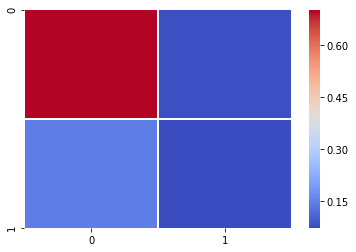

In [46]:
from sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
import seaborn as sn
from pylab import savefig
import numpy as np

cm_NB =cm(y_NB_test,y_NB_pred)
print("Confusion Matrix Naive Bayes",cm_NB)
NB_hm = sn.heatmap(cm_NB/np.sum(cm_NB),annot =False,cmap = 'coolwarm',linewidths=1,linecolor='White',fmt = '.2%')
NB_fig =NB_hm.get_figure()
NB_fig.savefig(r'D:\NB_cm.png',dpi =400)







Confusion Matrix DT [[3071  150]
 [  93  812]]


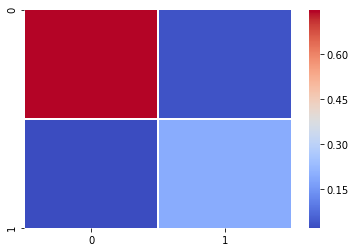

In [45]:
cm_DT =cm(y_DT_test,y_DT_pred.round())
print("Confusion Matrix DT",cm_DT)
DT_hm = sn.heatmap(cm_DT/np.sum(cm_DT),annot =False,cmap = 'coolwarm',linewidths=1,linecolor='White',fmt = '.2%')
DT_fig =DT_hm.get_figure()
DT_fig.savefig(r'D:\DT_cm.png',dpi =400)

Confusion Matrix Random Forest [[3199   22]
 [  88  817]]


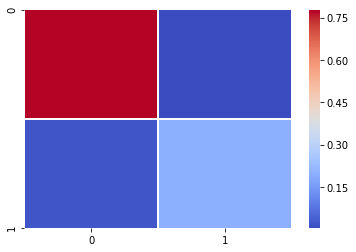

In [44]:
cm_RF =cm(y_RF_test,y_RF_pred)
print("Confusion Matrix Random Forest",cm_RF)
RF_hm = sn.heatmap(cm_RF/np.sum(cm_RF),annot =False,cmap = 'coolwarm',linewidths=1,linecolor='White',fmt = '.2%')
RF_fig =RF_hm.get_figure()
RF_fig.savefig(r'D:\RF_cm.png',dpi =400)

NameError: name 'ticker' is not defined

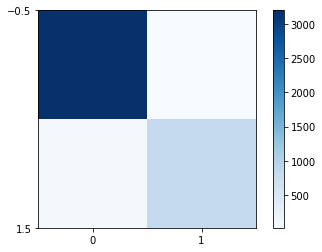

In [43]:
import matplotlib.ticker
cm_R =cm(y_RF_test,y_RF_pred)
fig,ax = plt.subplots()
im = ax.imshow(cm_R,interpolation = 'nearest',cmap = plt.cm.Blues)
ax.figure.colorbar(im,ax=ax)
ax.set(yticks=[-0.5,1.5],
      xticks=[0,1])
ax.yaxis.set_major_locator(ticker.IndexLocator(base =1,offset=0.5))